In [268]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


In [270]:
Titanic = pd.read_csv('/Users/ezzan/Downloads/python_drills/titanic.csv')
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [275]:
Titanic = pd.read_csv('/Users/ezzan/Downloads/python_drills/titanic.csv')
Titanic.dtypes
#Titanic["alone"]=Titanic["alone"].astype(np.int64)
#Titanic["adult_male"]=Titanic["adult_male"].fillna(0).astype(bool)

Titanic["sex"] = Titanic["sex"].map({"male": 1, "female":0}).fillna(0).astype(np.int64)
Titanic['age'] = Titanic['age'].fillna(Titanic['age'].median()).astype(np.int64)
Titanic["adult_male"] = Titanic["adult_male"].map({"True": 1, "False":0}).fillna(0).astype(np.int64)
Titanic = Titanic.drop(["embark_town", "deck", "alive"], axis=1)
#Titanic.birth_year.astype(int)
Titanic['embarked'] = Titanic['embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(np.int64)
Titanic['alone'] = Titanic["alone"].map({'True': 1, 'False':0}).fillna(0).astype(np.int64)
Titanic['class'] = Titanic["class"].map({"First": 1, "Second":2, "Third":3}).fillna(0).astype(np.int64)
Titanic['who'] = Titanic["who"].map({"man": 1, "woman":2, "child":3}).fillna(0).astype(np.int64)
Titanic["fare"] = Titanic["fare"].astype(np.int64)
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,0,3,1,0,0
1,1,1,0,38,1,0,71,1,1,2,0,0
2,1,3,0,26,0,0,7,0,3,2,0,0
3,1,1,0,35,1,0,53,0,1,2,0,0
4,0,3,1,35,0,0,8,0,3,1,0,0
5,0,3,1,28,0,0,8,2,3,1,0,0
6,0,1,1,54,0,0,51,0,1,1,0,0
7,0,3,1,2,3,1,21,0,3,3,0,0
8,1,3,0,27,0,2,11,0,3,2,0,0
9,1,2,0,14,1,0,30,1,2,3,0,0


In [277]:
Titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7,0,3,1,0,0
1,1,1,0,38,1,0,71,1,1,2,0,0
2,1,3,0,26,0,0,7,0,3,2,0,0
3,1,1,0,35,1,0,53,0,1,2,0,0
4,0,3,1,35,0,0,8,0,3,1,0,0
5,0,3,1,28,0,0,8,2,3,1,0,0
6,0,1,1,54,0,0,51,0,1,1,0,0
7,0,3,1,2,3,1,21,0,3,3,0,0
8,1,3,0,27,0,2,11,0,3,2,0,0
9,1,2,0,14,1,0,30,1,2,3,0,0


# Survival Rate by Gender and Age

(-1.1036018690484248,
 1.1052194262644779,
 -1.1047638231918304,
 1.1002268487234206)

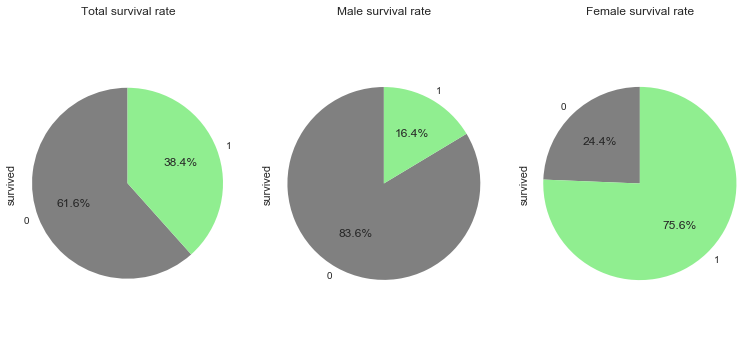

In [110]:
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['grey', 'lightgreen']
}


# Plots a bar graph of those who surived vs those who did not
plt.subplot2grid((1,3), (0,0))
Titanic.survived.value_counts() \
.plot(title='Total survival rate', **plot_params).axis('equal')


# Survival rate wrt Sex
df_male = Titanic.survived[Titanic.who == 1].value_counts(normalize=True, sort=False)
df_female = Titanic.survived[Titanic.who == 2].value_counts(normalize=True, sort=False)
df_1 = Titanic.survived[Titanic.embarked == 0].value_counts(normalize=True, sort=False)
df_2 = Titanic.survived[Titanic.embarked == 1].value_counts(normalize=True, sort=False)
df_3 = Titanic.survived[Titanic.embarked == 2].value_counts(normalize=True, sort=False)
df_p1 = Titanic.survived[Titanic.pclass == 1].value_counts(normalize=True, sort=False)
df_p2 = Titanic.survived[Titanic.pclass == 2].value_counts(normalize=True, sort=False)
df_p3 = Titanic.survived[Titanic.pclass == 3].value_counts(normalize=True, sort=False)
dfch = Titanic.survived[Titanic.who == 3].value_counts(normalize=True, sort=False)
## male survival plot
plt.subplot2grid((1,3),(0,1))
df_male.plot(title='Male survival rate', **plot_params).axis('equal')

## female survival plot

plt.subplot2grid((1,3),(0,2))
df_female.plot(title='Female survival rate', **plot_params).axis('equal')




# Survival Statistics based on Class

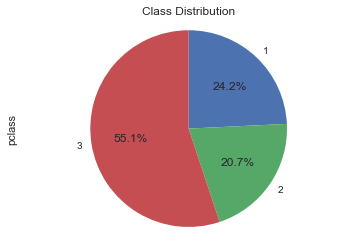

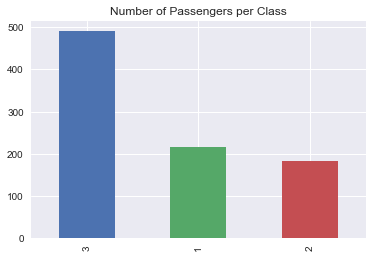

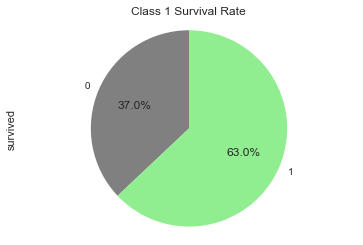

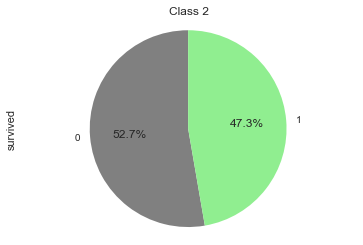

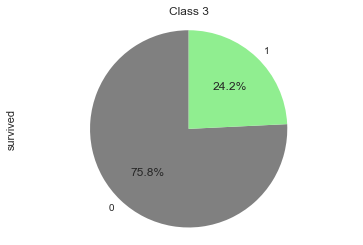

<Figure size 432x288 with 0 Axes>

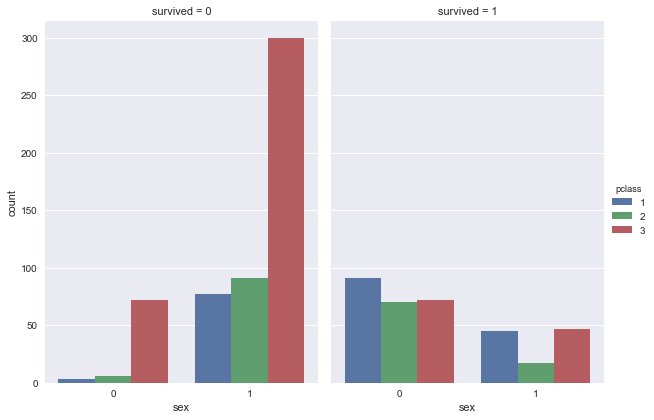

In [111]:

Titanic.pclass.value_counts(sort=False).plot(kind='pie', title='Class Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
plt.show()


Titanic['pclass'].value_counts().plot(kind='bar', title='Number of Passengers per Class',grid=True)
plt.show()


df_p1.plot(title='Class 1 Survival Rate', **plot_params).axis('equal')
plt.show()

df_p2.plot(title='Class 2', **plot_params).axis('equal')
plt.show()

df_p3.plot(title='Class 3', **plot_params).axis('equal')
plt.show()
plt.tight_layout()
plt.show()

sns.factorplot(x="sex", hue = "pclass" , col="survived", data=Titanic , kind="count",size=6, aspect=.7);

# Survival Rates based on City Embarked

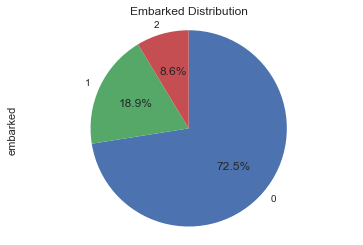

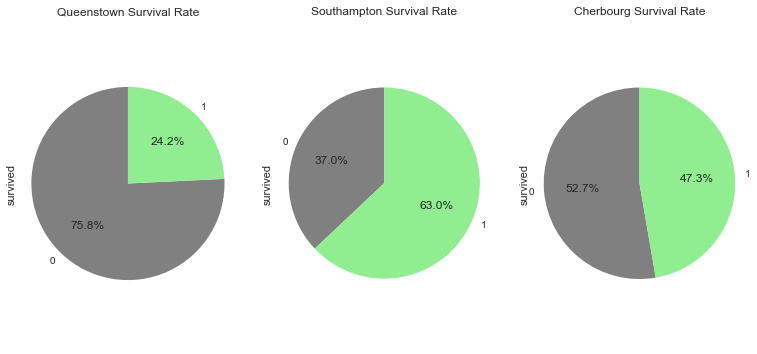

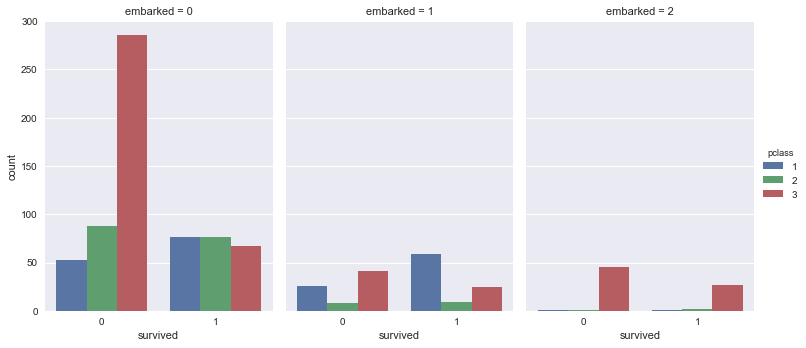

In [109]:
Titanic.embarked.value_counts(sort=False).plot(kind='pie', title='Embarked Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
plt.show()

plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['grey', 'lightgreen']
}

plt.subplot2grid((1,3),(0,0))
df_p3.plot(title='Queenstown Survival Rate', **plot_params).axis('equal')

plt.subplot2grid((1,3),(0,1))
df_p1.plot(title='Southampton Survival Rate', **plot_params).axis('equal')

plt.subplot2grid((1,3),(0,2))
df_p2.plot(title='Cherbourg Survival Rate', **plot_params).axis('equal')
plt.show()

sns.factorplot(x="survived",col="embarked",data=Titanic ,hue="pclass", kind="count",size=5, aspect=.7);

# Survival Rates based on Age

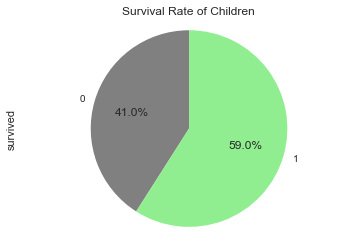

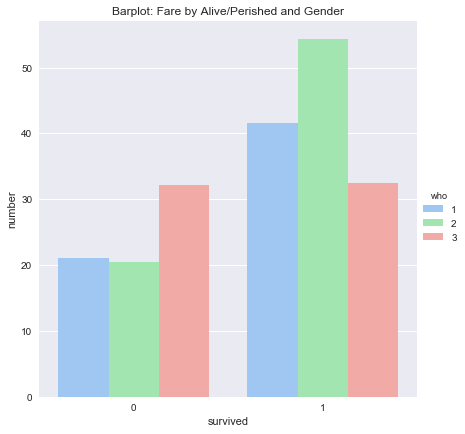

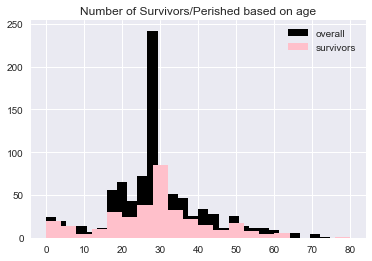

In [104]:

dfch.plot(title='Survival Rate of Children', **plot_params).axis('equal')
sns.set(style="darkgrid")

g = sns.factorplot(x="survived", y="fare", hue="who", data=Titanic,
                   size=6, kind="bar", palette="pastel", ci=None)
g.despine(left=True)
g.set_ylabels("number")
g.set_xlabels("survived")
plt.title('Barplot: Fare by Alive/Perished and Gender')
plt.show()

plt.hist(Titanic['age'].dropna(), bins='auto', color = 'black', label = 'overall')
surv = Titanic[Titanic['survived']==1 ]
plt.hist(surv['age'].dropna(), bins ='auto', color = 'pink', label = 'survivors')
plt.legend()

plt.title("Number of Survivors/Perished based on age")
plt.show()


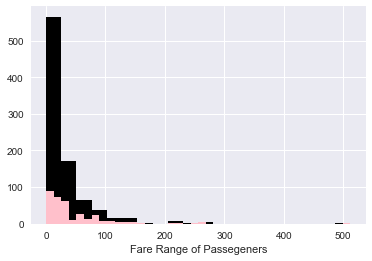

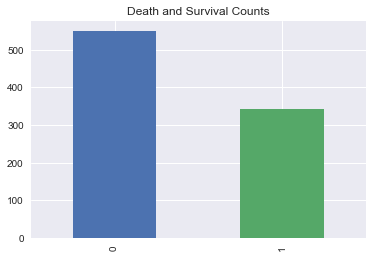

In [103]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.hist(Titanic['fare'].dropna(),bins=20, color = 'black')
surv1 = Titanic[Titanic['survived']==1 ]
plt.hist(surv1['fare'].dropna(), bins ='auto', color = 'pink', label = 'survivors')
plt.xlabel('Fare Range of Passegeners')
plt.show()

Titanic['survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()


In [15]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


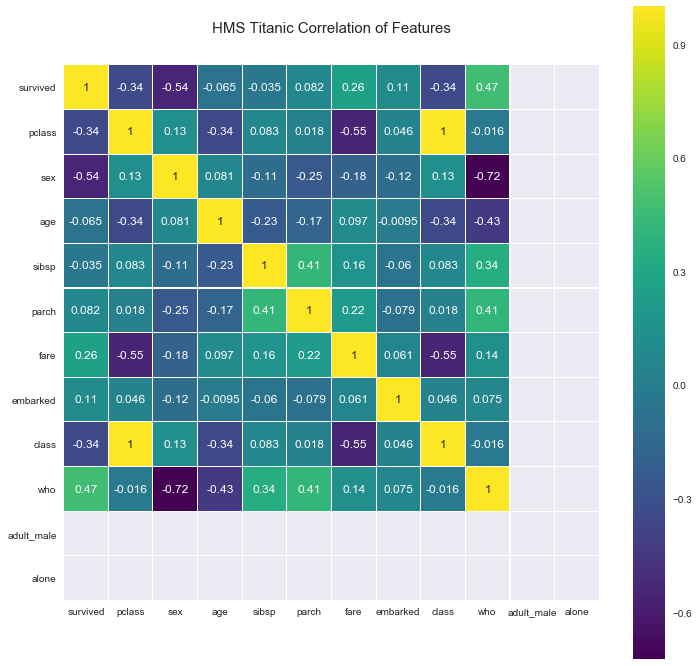

In [106]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('HMS Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(Titanic.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# KNN Tests

In [332]:
from sklearn.metrics import confusion_matrix
Titanic['age'] = Titanic['age'].fillna(0).astype(np.int64)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNNw = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
X = Titanic.drop("survived", axis=1)
Y = Titanic.survived

KNN.fit(X,Y)
KNNw.fit(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
accuracy_score(Y_test, Y_pred)

score = cross_val_score(KNN, X, Y, cv=5)
score1 = cross_val_score(KNNw, X, Y, cv=5)

In [333]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance

scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=7)
newX = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.28954306 0.26502937 0.13063471 0.10024811 0.08263811 0.06264032
 0.05074168]
[48.18553539 46.10065661 32.3660277  28.35294708 25.74247403 22.41233422
 20.17170103]


In [334]:
confusion_matrix(Y_test, Y_pred)

array([[120,  14],
       [ 19,  70]], dtype=int64)

In [335]:
print(score)
print(score.mean())

[0.67597765 0.69273743 0.73033708 0.7247191  0.70621469]
0.7059971905679401


In [336]:
print(score1)
print(score1.mean())


[0.70391061 0.70949721 0.7247191  0.70224719 0.72316384]
0.7127075910343583


In [337]:
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN5w = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
KNN5.fit(X,Y)
KNN5w.fit(X,Y)
score5 = cross_val_score(KNN, X, Y, cv=5)
score5w = cross_val_score(KNNw, X, Y, cv=5)
score5PCA = cross_val_score(KNN, newX, Y, cv=5)
score5wPCA = cross_val_score(KNNw, newX, Y, cv=5)
print(score5)
print(score5.mean())

[0.67597765 0.69273743 0.73033708 0.7247191  0.70621469]
0.7059971905679401


In [338]:
print(score5w)
print(score5w.mean())

[0.70391061 0.70949721 0.7247191  0.70224719 0.72316384]
0.7127075910343583


In [341]:
cross_val_score(KNN, X_train, Y_train, cv=5).mean()

0.7768825047693863

## KNN PCA

In [342]:
scorePCA = cross_val_score(KNN, newX, Y, cv=5)
print(scorePCA)
print(scorePCA.mean())

[0.75977654 0.75977654 0.79213483 0.80337079 0.81355932]
0.785723602527425


In [343]:
score1PCA = cross_val_score(KNNw, newX, Y, cv=5)
print(score1PCA)
print(score1PCA.mean())

[0.75977654 0.75418994 0.80898876 0.75280899 0.79661017]
0.7744748805494883


In [344]:
print(score5PCA)
print(score5PCA.mean())

[0.75977654 0.75977654 0.79213483 0.80337079 0.81355932]
0.785723602527425


In [345]:
print(score5wPCA)
print(score5wPCA.mean())

[0.75977654 0.75418994 0.80898876 0.75280899 0.79661017]
0.7744748805494883



## SVM Testing

In [346]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
accuracy_score(Y_test, Y_pred)

SVMX = pca.fit_transform(scaled_X)



In [347]:

Y_pred = KNN.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.852017937219731

In [348]:
SVM.score(X_train, Y_train)

0.8053892215568862

In [349]:
SVM.score(X_test, Y_test)

0.852017937219731

In [297]:
print(cross_val_score(SVM, X, Y, cv=5))
print(cross_val_score(SVM, X, Y, cv=5).mean())

[0.82122905 0.82122905 0.80898876 0.76404494 0.81920904]
0.80694016959437


In [350]:
confusion_matrix(Y_test, Y_pred)

array([[120,  14],
       [ 19,  70]], dtype=int64)

### SVM Testing (PCA) 

In [298]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=4)
ss = StandardScaler()
scalerx = ss.fit_transform(X)
# Create a new training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(scalerx, Y, test_size=0.3)

# Fit and transform training and testing dataset with PCA
X_train_pca = pca.fit_transform(X_train2)
X_test_pca = pca.fit_transform(X_test2)

In [299]:
SVM.score(X_train2, y_train2)

0.8234349919743178

In [300]:
SVM.score(X_test2, y_test2)

0.8022388059701493

## Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression

logisticregression = LogisticRegression(C=1e9)
fit = logisticregression.fit(X, Y)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = logisticregression.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average Regression Accuracy score:')
print(sum(score)/4)

Coefficients
[[-0.38358859 -0.74689974 -0.25306408 -0.44307835 -0.24124661  0.31431863
   0.14751658 -0.38358859  0.77277173  0.          0.        ]]
[-0.66213533]

 Accuracy by admission status
survived    0    1
row_0             
0         446  169
1         103  173
0.811377245508982

 Accuracy scores:
[0.82142857 0.82035928 0.80239521 0.78313253]

 Average Regression Accuracy score:
0.8068288981417543


### Logistic Regression (PCA) 

In [302]:

fit = logisticregression.fit(X_train2, y_train2)
predict_train = fit.predict(X_train2)

# Cross-validate.
scorepca = cross_val_score(logisticregression, X_train2, y_train2, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = logisticregression.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train2,y_train2))
print('\n Accuracy scores:')
print(scorepca)
print('\n Average Regression Accuracy score:')
print(sum(scorepca)/4)

Coefficients
[[-0.47456227 -0.79979642 -0.24160115 -0.49474745 -0.25429917  0.15289511
   0.10874597 -0.47456227  0.91977728  0.          0.        ]]
[-0.71540951]

 Accuracy by admission status
survived    0    1
row_0             
0         515  234
1          34  108
0.8234349919743178

 Accuracy scores:
[0.81528662 0.80769231 0.87096774 0.78709677]

 Average Regression Accuracy score:
0.8202608620062904


## Decision Tree

In [80]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [278]:

cvscore = cross_val_score(clf1, X, Y, cv=5)
cvscore1 = cross_val_score(clf1, newX, Y, cv=5)

In [279]:
print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

[0.83798883 0.81564246 0.82022472 0.79775281 0.85310734]
-------------------------------------------------------------
mean cv score = 0.825 +- 0.019


In [83]:
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
cvscore2 = cross_val_score(clf2, X, Y, cv=5)
cvscore2pca = cross_val_score(clf2, newX, Y, cv=5)
print(cvscore2)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2.mean(), cvscore2.std()))

[0.83798883 0.81564246 0.82022472 0.79775281 0.84745763]
-------------------------------------------------------------
mean cv score = 0.824 +- 0.017


In [84]:
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=5)
cvscore3 = cross_val_score(clf3, X, Y, cv=5)
cvscore3pca = cross_val_score(clf3, newX, Y, cv=5)
print(cvscore3)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3.mean(), cvscore3.std()))

[0.84916201 0.7877095  0.84269663 0.80898876 0.85310734]
-------------------------------------------------------------
mean cv score = 0.828 +- 0.026


In [85]:
clf5 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
cvscore5pca = cross_val_score(clf5, newX, Y, cv=5)
cvscore5 = cross_val_score(clf5, X, Y, cv=5)
print(cvscore5)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5.mean(), cvscore5.std()))

[0.83798883 0.82122905 0.82022472 0.79775281 0.85310734]
-------------------------------------------------------------
mean cv score = 0.826 +- 0.019


In [86]:
clf6 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)
cvscore6pca = cross_val_score(clf6, newX, Y, cv=5)
cvscore6 = cross_val_score(clf6, X, Y, cv=5)
print(cvscore6)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6.mean(), cvscore6.std()))

[0.8547486  0.79888268 0.82022472 0.81460674 0.85875706]
-------------------------------------------------------------
mean cv score = 0.829 +- 0.023


## Decision Tree (PCA)

In [87]:
print(cvscore1)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore1.mean(), cvscore1.std()))

[0.82122905 0.80446927 0.83146067 0.80898876 0.83050847]
-------------------------------------------------------------
mean cv score = 0.819 +- 0.011


In [88]:

print(cvscore2pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2pca.mean(), cvscore2pca.std()))

[0.80446927 0.79888268 0.81460674 0.78089888 0.84745763]
-------------------------------------------------------------
mean cv score = 0.809 +- 0.022


In [89]:

print(cvscore3pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3pca.mean(), cvscore3pca.std()))

[0.74301676 0.79888268 0.80337079 0.78651685 0.84180791]
-------------------------------------------------------------
mean cv score = 0.795 +- 0.032


In [90]:

print(cvscore5pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5pca.mean(), cvscore5pca.std()))

[0.82122905 0.79888268 0.83146067 0.80898876 0.83050847]
-------------------------------------------------------------
mean cv score = 0.818 +- 0.013


In [91]:

print(cvscore6pca)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6pca.mean(), cvscore6pca.std()))

[0.80446927 0.77094972 0.80898876 0.78089888 0.83615819]
-------------------------------------------------------------
mean cv score = 0.800 +- 0.023


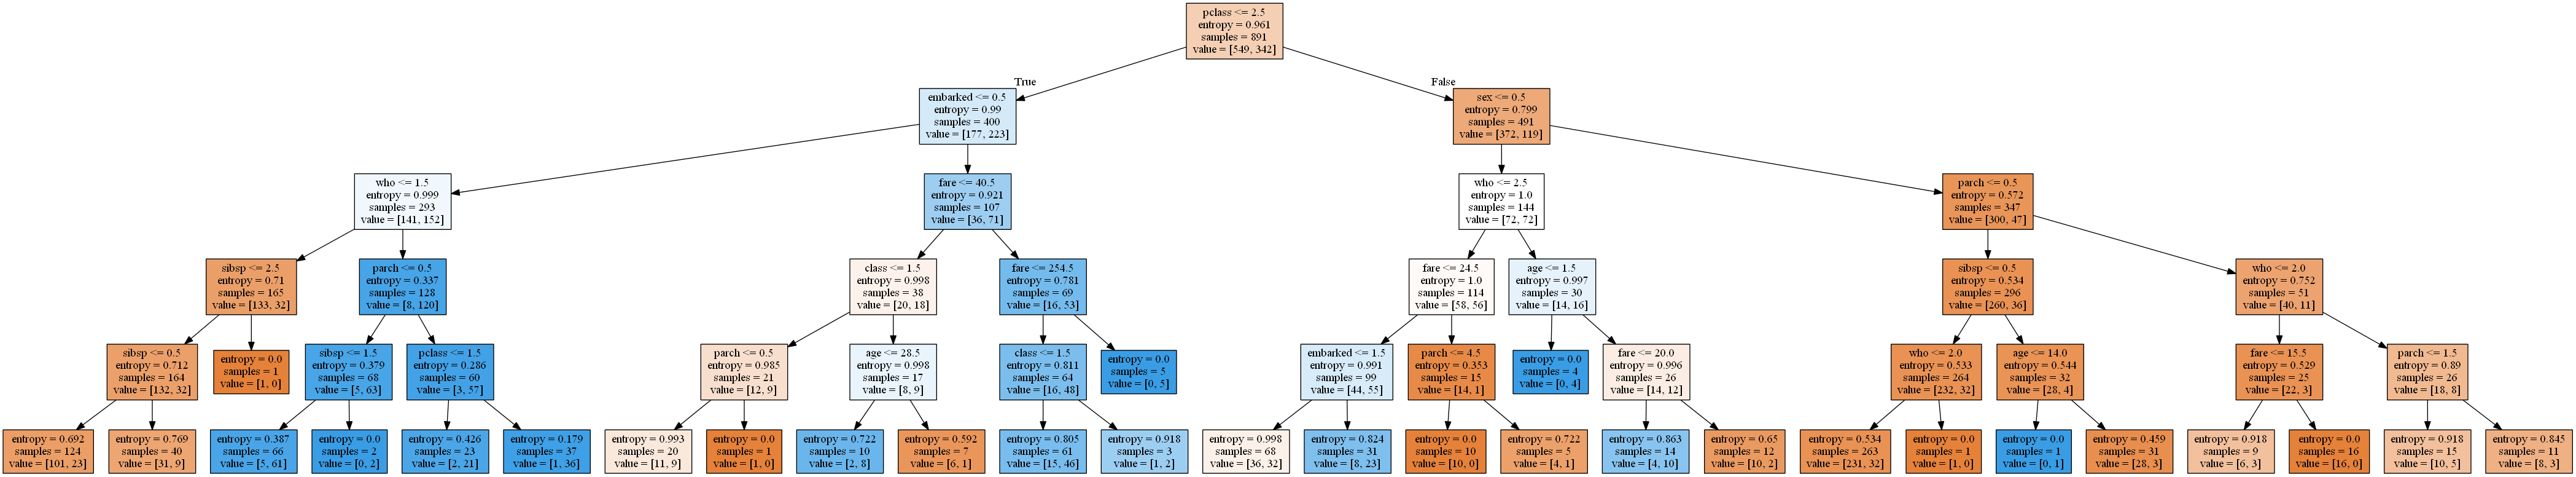

In [92]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

import pydotplus
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest

In [130]:
from sklearn import ensemble
rfc1 = ensemble.RandomForestClassifier(max_depth=3)
cvscore7 = cross_val_score(rfc1, X, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.84357542 0.82681564 0.82022472 0.79775281 0.84180791]
-------------------------------------------------------------
mean cv score = 0.826 +- 0.017


In [131]:
from sklearn import ensemble
rfc2= ensemble.RandomForestClassifier(max_depth=4)
cvscore7 = cross_val_score(rfc2, X, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.82681564 0.82681564 0.8258427  0.79775281 0.85310734]
-------------------------------------------------------------
mean cv score = 0.826 +- 0.018


## Random Forest (PCA)

In [132]:
from sklearn import ensemble
rfc3 = ensemble.RandomForestClassifier(max_depth=3)
cvscore7 = cross_val_score(rfc3, newX, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.73743017 0.82122905 0.7752809  0.79213483 0.8079096 ]
-------------------------------------------------------------
mean cv score = 0.787 +- 0.029


In [133]:
from sklearn import ensemble
rfc4 = ensemble.RandomForestClassifier(max_depth=4)
cvscore7 = cross_val_score(rfc4, newX, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.84357542 0.79329609 0.82022472 0.79775281 0.81355932]
-------------------------------------------------------------
mean cv score = 0.814 +- 0.018


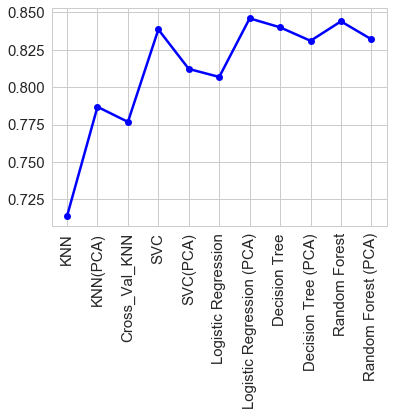

In [251]:
predict= ['KNN','KNN(PCA)','Cross_Val_KNN','SVC','SVC(PCA)','Logistic Regression','Logistic Regression (PCA)','Decision Tree','Decision Tree (PCA)','Random Forest','Random Forest (PCA)']


predict = pd.DataFrame(index=predict)
# Add our columns to the data frame one at a time.
predict["xx"] =[0.7138438116070469,0.7868534751029068,0.7768, 0.8385650224215246,0.812199036918138,0.8068288981417543,0.846,0.84,0.831,0.844,0.832]


plt.plot(predict['xx'],  marker='o', color='b')
plt.xticks(rotation=90)
plt.show()